<a href="https://colab.research.google.com/github/SanjayS2348553/Speech_Processing/blob/main/2348553_SANJAY_S_SPR_LAB_05_%26_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Time Normalization

(a) Plot both speech signals

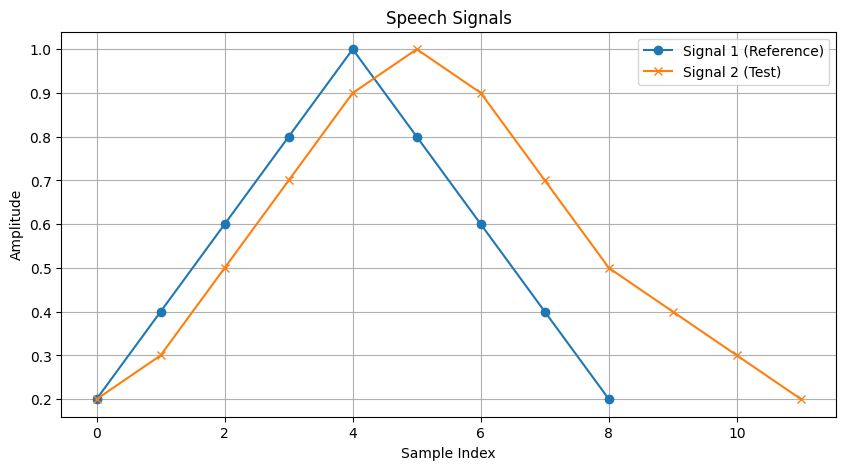

In [ ]:
import matplotlib.pyplot as plt

# Signals
signal1 = [0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2]
signal2 = [0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(signal1, label='Signal 1 (Reference)', marker='o')
plt.plot(signal2, label='Signal 2 (Test)', marker='x')
plt.title('Speech Signals')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


(b) Perform Linear Time Normalization

In [ ]:
import numpy as np

def linear_time_normalization(signal1, signal2):
    len1 = len(signal1)
    len2 = len(signal2)
    normalized_signal2 = np.interp(np.linspace(0, len2 - 1, len1), np.arange(len2), signal2)
    return normalized_signal2

normalized_signal2 = linear_time_normalization(signal1, signal2)


(c) Compute the alignment

In [ ]:
alignment = list(zip(signal1, normalized_signal2))


(d) Plot the alignment path

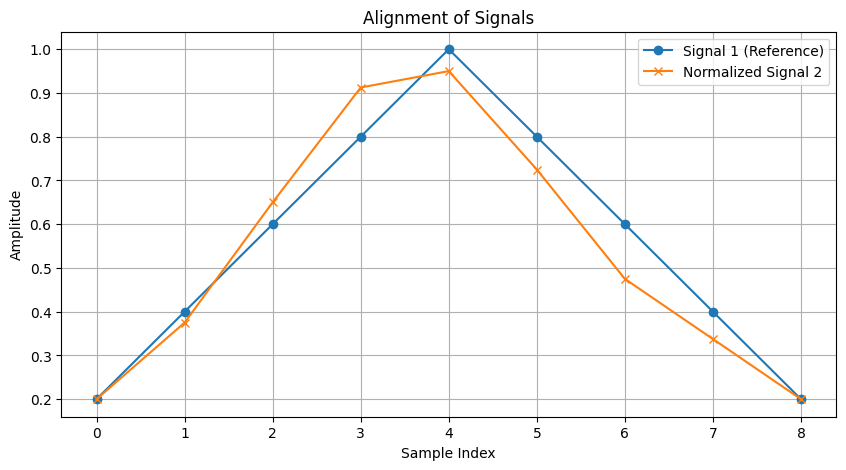

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(signal1, label='Signal 1 (Reference)', marker='o')
plt.plot(normalized_signal2, label='Normalized Signal 2', marker='x')
plt.title('Alignment of Signals')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


INFERENCE:
Similarity: The overall similar shape of the two signals suggests that they might represent similar underlying phenomena or processes.

Normalization: The fact that Signal 2 is normalized indicates that it might have been scaled to match the amplitude range of Signal 1 for better comparison.

Phase Shift: The phase shift between the signals could be due to various factors, such as timing differences in the acquisition or processing of the signals.

Alignment Quality: The alignment path shows that the two signals have been aligned to a certain degree, but there is still room for improvement. The discrepancies in the lower amplitude regions suggest that the alignment algorithm might need further refinement or additional parameters to achieve a more precise alignment.

# **Dynamic Time Warping**

(a) Plot both vectors

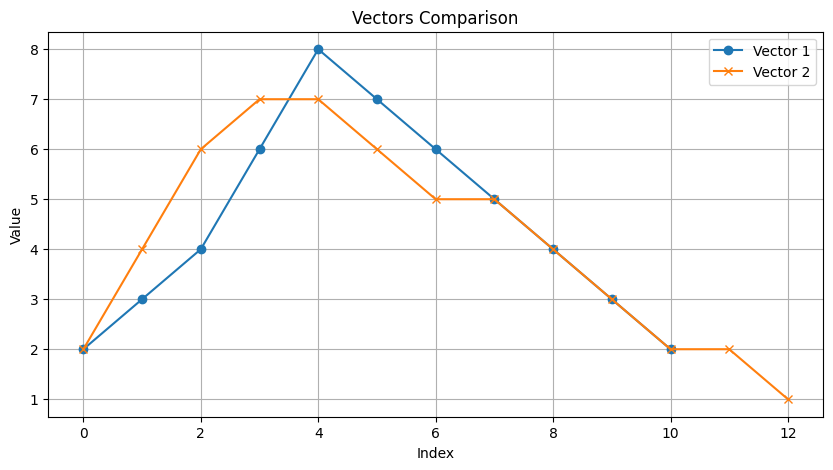

In [ ]:
import matplotlib.pyplot as plt

vector1 = [2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2]
vector2 = [2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1]

plt.figure(figsize=(10, 5))
plt.plot(vector1, label='Vector 1', marker='o')
plt.plot(vector2, label='Vector 2', marker='x')
plt.title("Vectors Comparison")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


Implement Dynamic Time Warping (DTW) Algorithm

In [ ]:
import numpy as np

def dtw(vec1, vec2):
    n, m = len(vec1), len(vec2)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(vec1[i - 1] - vec2[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j],    # insertion
                                          dtw_matrix[i, j - 1],    # deletion
                                          dtw_matrix[i - 1, j - 1]) # match

    return dtw_matrix


Compute the Accumulated Cost Matrix

In [ ]:
dtw_matrix = dtw(vector1, vector2)
print("Accumulated Cost Matrix:")
print(dtw_matrix)


Accumulated Cost Matrix:
[[ 0. inf inf inf inf inf inf inf inf inf inf inf inf inf]
 [inf  0.  2.  6. 11. 16. 20. 23. 26. 28. 29. 29. 29. 30.]
 [inf  1.  1.  4.  8. 12. 15. 17. 19. 20. 20. 21. 22. 24.]
 [inf  3.  1.  3.  6.  9. 11. 12. 13. 13. 14. 16. 18. 21.]
 [inf  7.  3.  1.  2.  3.  3.  4.  5.  7. 10. 14. 18. 23.]
 [inf 13.  7.  3.  2.  3.  5.  6.  7.  9. 12. 16. 20. 25.]
 [inf 18. 10.  4.  2.  2.  3.  5.  7. 10. 13. 17. 21. 26.]
 [inf 22. 12.  4.  3.  3.  2.  3.  4.  6.  9. 13. 17. 22.]
 [inf 25. 13.  5.  5.  5.  3.  2.  2.  3.  5.  8. 11. 15.]
 [inf 27. 13.  7.  8.  8.  5.  3.  3.  2.  3.  5.  7. 10.]
 [inf 28. 14. 10. 11. 12.  8.  5.  5.  3.  2.  3.  4.  6.]
 [inf 28. 16. 14. 15. 16. 12.  8.  8.  5.  3.  2.  2.  3.]]


Find and Visualize the Warping Path

In [ ]:
def backtrack(dtw_matrix):
    i, j = dtw_matrix.shape[0] - 1, dtw_matrix.shape[1] - 1
    path = [(i - 1, j - 1)]

    while i > 0 and j > 0:
        current_cost = dtw_matrix[i, j]
        if i > 0 and j > 0 and current_cost == dtw_matrix[i - 1, j - 1] + abs(vector1[i - 1] - vector2[j - 1]):
            path.append((i - 1, j - 1))
            i -= 1
            j -= 1
        elif i > 0 and current_cost == dtw_matrix[i - 1, j] + abs(vector1[i - 1] - vector2[j - 1]):
            path.append((i - 1, j))
            i -= 1
        else:
            path.append((i, j - 1))
            j -= 1

    path.reverse()
    return path

warping_path = backtrack(dtw_matrix)
print("Warping Path:")
print(warping_path)


Warping Path:
[(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (8, 8), (9, 9), (10, 10), (11, 11), (11, 12), (10, 12)]


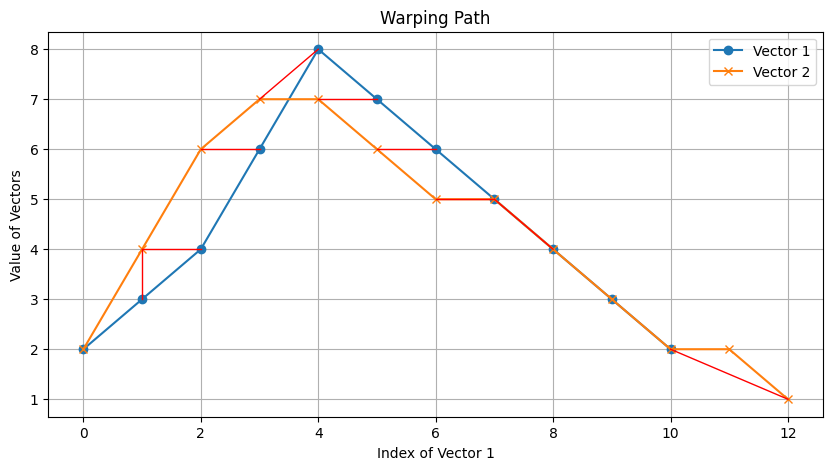

In [ ]:
# Assuming you already have vector1, vector2, dtw_matrix computed, and warping_path found

plt.figure(figsize=(10, 5))
plt.plot(vector1, label='Vector 1', marker='o')
plt.plot(vector2, label='Vector 2', marker='x')

# Recompute the warping path to ensure it's correctly indexed
warping_path = backtrack(dtw_matrix)

# Plot the warping path (as lines between points)
for (i, j) in warping_path:
    if i < len(vector1) and j < len(vector2):  # Ensure indices are within bounds
        plt.plot([i, j], [vector1[i], vector2[j]], color='red', linewidth=1)

plt.title("Warping Path")
plt.xlabel("Index of Vector 1")
plt.ylabel("Value of Vectors")
plt.legend()
plt.grid()
plt.show()

 Calculate the DTW Distance

In [ ]:
dtw_distance = dtw_matrix[-1, -1]
print("DTW Distance:", dtw_distance)


DTW Distance: 3.0




**INFERENCE:**Similarity in Shape: The two vectors have a similar overall shape, but they exhibit local differences in timing.
Time Warping: The DTW algorithm has effectively aligned the vectors by warping their time axes. This is evident from the non-linear nature of the warping path.
Moderate Dissimilarity: The DTW distance of 3.0 suggests a moderate level of dissimilarity between the vectors. This indicates that while the vectors are similar in shape, there are some significant differences in their temporal alignment.